In [82]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pacoty.mplstyle')
font = {'size'   : 16}
plt.rc('font', **font)

In [83]:
def parseTiming(fname):
    with open(fname, 'r') as f:
        for line in f:
            if "diverged" in line: raise Exception(f"iterations in file {fname} diverged!")
            if "Braid" in line: continue
            if "wall time" in line: return float(line.split()[-1])

def parseTol(fname, tol):
    with open(fname, 'r') as f:
        for line in f:
            if "diverged" in line: raise Exception(f"iterations in file {fname} diverged!")
            if "Begin" in line: continue
            if "not available" in line: continue
            if "Solver Stats" in line: continue
            if "Braid" in line and "wall time" in line:
                res = float(line.split()[5].split(',')[0])
                if res <= tol:
                    return float(line.split()[-1])

def parseIters(fname):
    with open(fname, 'r') as f:
        for line in f:
            if "max iterations" in line: continue
            if "Max" in line: continue
            if "iterations" in line: return float(line.split()[-1])

In [91]:
ncores = (8, 32, 128, 512, 2048)
mlevels = (2, 3, 4, 4, 5)
serials = np.zeros(len(ncores))
thetas = np.zeros(len(ncores))
deltas = np.zeros(len(ncores))
mgrits = np.zeros(len(ncores)-1)
tol = 2e-5

for i, (nc, ml) in enumerate(zip(ncores, mlevels)):
    serials[i] = parseTiming(f"ks_nc{nc}_ml1")
    # thetas[i] = parseTiming(f"ks_theta_nc{nc}_ml{ml}")
    # deltas[i] = parseTiming(f"ks_Delta_nc{nc}_ml{ml}")

for i, (nc, ml) in enumerate(zip(ncores, mlevels)):
    # thetas[i] = parseTol(f"ks_theta_nc{nc}_ml{ml}", tol)
    thetas[i] = parseTiming(f"ks_theta_nc{nc}_ml{ml}")

for i, (nc, ml) in enumerate(zip(ncores, mlevels)):
    # deltas[i] = parseTol(f"ks_Delta_nc{nc}_ml{ml}", tol)
    deltas[i] = parseTiming(f"ks_Delta_nc{nc}_ml{ml}")

for i, (nc, ml) in enumerate(zip(ncores[1:], mlevels[1:])):
    # mgrits[i] = parseTol(f"ks_nc{nc}_ml{ml}", tol)
    mgrits[i] = parseTiming(f"ks_nc{nc}_ml{ml}")

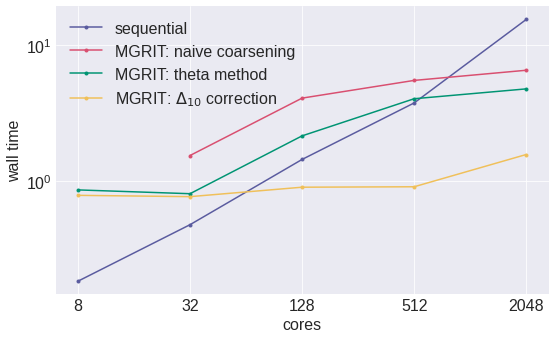

In [92]:
fig, ax = plt.subplots(figsize=(8,5))
ax.loglog(ncores, serials, '.-', label="sequential")
ax.loglog(ncores[1:], mgrits, '.-', label="MGRIT: naive coarsening")
ax.loglog(ncores, thetas, '.-', label="MGRIT: theta method")
ax.loglog(ncores, deltas, '.-', label=r"MGRIT: $\Delta_{10}$ correction")
ax.set_xlabel("cores")
ax.set_ylabel("wall time")
ax.legend()
plt.xticks(ncores, ncores)
plt.tight_layout()
plt.savefig("weak_scaling_KS_128.png")

In [86]:
mgrits

array([1.52, 4.04,  nan,  nan])